1. FCB Exercises 3.3 : Tumor counts

cf. week2_lab.ipynb 참고 : Birth rates for Poisson Model (FCB P.48~50)

In [9]:
# (a)
import scipy
import scipy.stats as st
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import nbinom
from scipy.stats import gamma

# Likelihood
def likelihood(theta, n, sy):
    return (theta**sy)*np.exp(-n*theta)

# prior parameters for thetaA ~ gamma(a1,b1)
a1 = 120
b1 = 10
prior1 = st.gamma(a1, scale= 1/b1)

# prior parameters for thetaB ~ gamma(a2,b2)
a2 = 12
b2 = 1
prior2 = st.gamma(a2, scale= 1/b2)

# data in group A and posterior distribution
# n=number of observed mice, sy=sum of their tumor counts
nA = 10
syA = 117
postA = st.gamma(a1+syA, scale=1/(b1+nA))

# data in group B and posterior distribution
nB = 13
syB = 113
postB = st.gamma(a2+syB, scale=1/(b2+nB))

i) group A

In [10]:
# post mean
(a1+syA)/(b1+nA)

11.85

In [11]:
# post mode
(a1+syA-1)/(b1+nA)

11.8

In [12]:
# post 95% ci
lbA=gamma.ppf(0.025, a1+syA, scale=1/(b1+nA))
ubA=gamma.ppf(0.975, a1+syA, scale=1/(b1+nA))
(lbA, ubA)

(10.389238190941795, 13.405448325642006)

ii) group B

In [16]:
# post mean
(a2+syB)/(b2+nB)

8.928571428571429

In [17]:
# post mode
(a2+syB-1)/(b2+nB)

8.857142857142858

In [18]:
# post 95% ci
lbB=gamma.ppf(0.025, a2+syB, scale=1/(b2+nB))
ubB=gamma.ppf(0.975, a2+syB, scale=1/(b2+nB))
(lbB,ubB)

(7.432064219464302, 10.560308149242363)

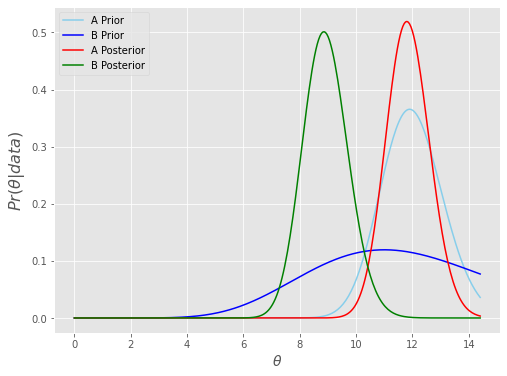

In [19]:
# comparing posterior of two groups
thetas = np.linspace(0.001, ubA+1, 300)
plt.figure(figsize=(8, 6))
plt.style.use('ggplot')
plt.plot(thetas, prior1.pdf(thetas), label='A Prior', c='skyblue')
plt.plot(thetas, prior2.pdf(thetas), label='B Prior', c='blue')
plt.plot(thetas, postA.pdf(thetas), label='A Posterior', c='red')
plt.plot(thetas, postB.pdf(thetas), label='B Posterior', c='green')
plt.xlabel(r'$\theta$', fontsize=14)
plt.ylabel(r'$Pr(\theta|data)$', fontsize=16)
plt.legend();

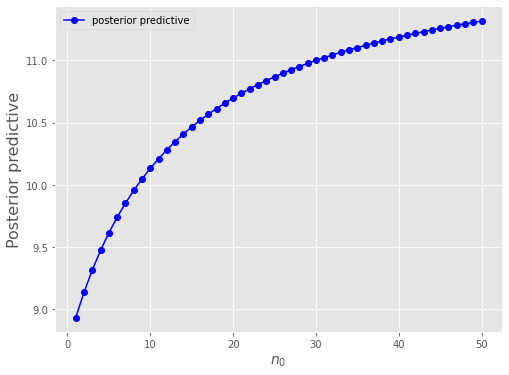

In [20]:
# (b)
# post predictive의 값은 (a+sy)/(b+nA)
nzeros = np.linspace(1, 50, 50)
plt.figure(figsize=(8, 6))
plt.style.use('ggplot')
plt.plot(nzeros, (12*nzeros+syB)/(nzeros+nB), label='posterior predictive', marker='o',c='blue')
plt.xlabel(r'$n_{0}$', fontsize=14)
plt.ylabel("Posterior predictive", fontsize=16)
plt.legend();

As n0 increases, our posterior predictive or posterior expectation also increases since prior gets stronger. Here, group B had smaller value of expectation of the data. So, larger n0 is necessary to get the similar value of the posterior predictive of group A.

In [ ]:
# (c)
Since the both groups hold the information about the tumor rates of the rats, but it is not that significant. Also, the sample size for group B was too small, unlike the group A. Thus, we can conclude that two groups are independent, which makes us to give the weak prior. 

2. Data가 binomial distribution일때, Likelihood를 Exponential Families 형태로 변환해 보기. 또한 왜 Beta distribution이 Conjugacy인지 생각해 보기.

cf. Appendix 참고

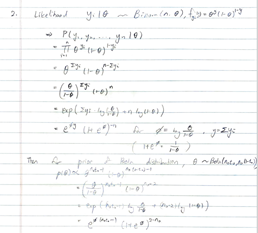

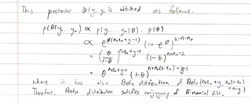

3. Relationship between Poisson distribution and Negative Binomial Distribution

$$ X \sim NB(r,p) $$

$$ p(x) = \binom{r-1+x}{x}(1-p)^{r}p^{x} $$

$$ Let:mean:\frac{pr}{1-p}=\lambda:::::::\to::::::p=\frac{\lambda}{r+\lambda} $$

a. Prove the following. $$ Poi(\lambda) = \lim_{r\to\infty}NB(r,\frac{\lambda}{r+\lambda}) $$ b. Compare the variance of each distribution. Show that the Negative Binomial distribution is always overdispersed.

c. Likewise, prove the following. $$ Y \sim Binom(n,p) $$

$$ p(y) = \binom{n}{x}p^{y}p^{n-y} $$

$$ Let:mean:np=\lambda::::::\to::::::p=\frac{\lambda}{n} $$

$$ Poi(\lambda) = \lim_{n\to\infty}Binom(n,\frac{\lambda}{n}) $$

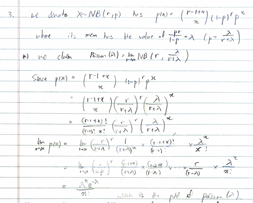

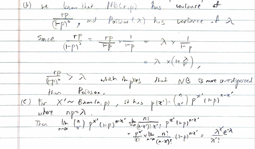

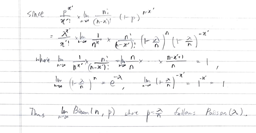